In [1]:
import pandas as pd

In [29]:
import string
import re
import numpy as np
import pandas as pd
from tensorflow import keras
%matplotlib inline
pd.set_option('display.max_colwidth', 200)
import matplotlib.pyplot as plt

In [34]:
import_df = pd.read_csv("ipatest.csv")
import_df = import_df.dropna()

In [35]:
ipa_array = np.array(import_df)

In [105]:
ipa_array[0:]

array([['hice', "'i-se"],
       ['combinación', "kom-bi-na-'si̯on"],
       ['inicio', "i-'ni-si̯o"],
       ['educación', "e-ðu-ka-'si̯on"],
       ['hasta', "'as-ta"],
       ['ojo', "'o-ho"],
       ['casi', "'ka-si"],
       ['usar', "u-'saɾ"],
       ['funcionar', "fun-si̯o-'naɾ"],
       ['cantar', "kan-'taɾ"],
       ['ayuda', "a-'ju-ða"],
       ['hombre', "'om-bɾe"],
       ['está', "es-'ta"],
       ['sabe', "'sa-βe"],
       ['oportunidad', "o-poɾ-tu-ni-'ðað"],
       ['toque', "'to-ke"],
       ['él', "'el"],
       ['su', "'su"],
       ['hermana', "eɾ-'ma-na"],
       ['esta', "'es-ta"],
       ['taza', "'ta-sa"],
       ['importante', "im-poɾ-'tan-te"],
       ['qué', "'ke"],
       ['el', "'el"],
       ['tanto', "'tan-to"],
       ['son', "'son"],
       ['masa', "'ma-sa"],
       ['diez', "'di̯es"],
       ['eso', "'e-so"],
       ['éxito', "'ek-si-to"],
       ['extra', "'eks-tɾa"],
       ['miedo', "'mi̯e-ðo"],
       ['voy', "'βoi̯"],
       ['leí', "le-'i"],
    

## In this dataset, the x axis is the Spanish word, the y axis is the ipa transcription with the accents and syllable breaks

## Let's get a better idea of what the string data actually looks like:

In [106]:
# first, let's grab one of the Spanish words
spanish_word = ipa_array[45][0]
print("Spanish Word: ", spanish_word)
for i,e in enumerate(spanish_word):
    print(i, e)

Spanish Word:  diario
0 d
1 i
2 a
3 r
4 i
5 o


In [107]:
# let's grab one of the IPA words
ipa_word = ipa_array[45][1]
print("IPA Word: ", ipa_word)
for i,e in enumerate(ipa_word):
    print(i,e)

IPA Word:  'di̯a-ɾi̯o
0 '
1 d
2 i
3 ̯
4 a
5 -
6 ɾ
7 i
8 ̯
9 o


## As we can see, the lengths are going to be different. Obviously, there is the addition of the syllable breaks (`-`) and the accent marks (`'`), but there is also the factor of the semi-vowel markings, which are being interpreted as new characters (` ̯`)

In [108]:
# lets test one more, just to see what it might look like
spanish_word2 = ipa_array[55][0]
print("Spanish Word: ", spanish_word2)
for i,e in enumerate(spanish_word2):
    print(i, e)

Spanish Word:  patrón
0 p
1 a
2 t
3 r
4 ó
5 n


In [109]:
ipa_word2 = ipa_array[55][1]
print("IPA Word: ", ipa_word2)
for i,e in enumerate(ipa_word2):
    print(i,e)

IPA Word:  pa-'tɾon
0 p
1 a
2 -
3 '
4 t
5 ɾ
6 o
7 n


# So it looks like the accented "o" (`ó`) is still read as a single character. This all is good information to know before moving forward

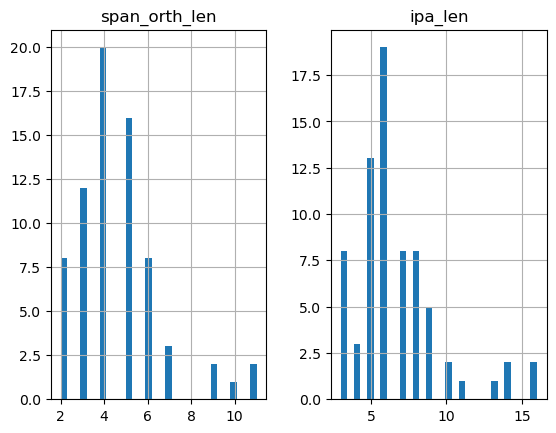

In [110]:
spanish_orth_len = [len(st) for st in ipa_array[:,0]]

ipa_len = [len(st) for st in ipa_array[:,1]]
    
length_df = pd.DataFrame({'span_orth_len':spanish_orth_len, 'ipa_len':ipa_len})

length_df.hist(bins = 30)
plt.show()

In [111]:
spanish_lists = []
ipa_lists = []

for i in ipa_array[:]:
    # iterate through characters in spanish
    _span_str = i[0]
    # create empty list
    _span_list = []
    # iterate through spanish characters
    for x,e in enumerate(_span_str):
        _span_list.append(e)
      
    # iterate through characters in ipa
    _ipa_str = i[1]
    _ipa_list = []
    # iterate through ipa characters
    for x,e in enumerate(_ipa_str):
        _ipa_list.append(e)
        
    # create a new string where each word is a list
    spanish_spaces = " ".join(_span_list)
    spanish_lists.append(spanish_spaces)
    ipa_spaces = " ".join(_ipa_list)
    ipa_lists.append(ipa_spaces)
    
    
        

In [112]:
def merge(list1, list2):
     
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

In [113]:
ipa_list_tup = merge(spanish_lists, ipa_lists)
ipa_array_clean = np.array(ipa_list_tup)

In [114]:
ipa_array_clean

array([['h i c e', "' i - s e"],
       ['c o m b i n a c i ó n', "k o m - b i - n a - ' s i ̯ o n"],
       ['i n i c i o', "i - ' n i - s i ̯ o"],
       ['e d u c a c i ó n', "e - ð u - k a - ' s i ̯ o n"],
       ['h a s t a', "' a s - t a"],
       ['o j o', "' o - h o"],
       ['c a s i', "' k a - s i"],
       ['u s a r', "u - ' s a ɾ"],
       ['f u n c i o n a r', "f u n - s i ̯ o - ' n a ɾ"],
       ['c a n t a r', "k a n - ' t a ɾ"],
       ['a y u d a', "a - ' j u - ð a"],
       ['h o m b r e', "' o m - b ɾ e"],
       ['e s t á', "e s - ' t a"],
       ['s a b e', "' s a - β e"],
       ['o p o r t u n i d a d', "o - p o ɾ - t u - n i - ' ð a ð"],
       ['t o q u e', "' t o - k e"],
       ['é l', "' e l"],
       ['s u', "' s u"],
       ['h e r m a n a', "e ɾ - ' m a - n a"],
       ['e s t a', "' e s - t a"],
       ['t a z a', "' t a - s a"],
       ['i m p o r t a n t e', "i m - p o ɾ - ' t a n - t e"],
       ['q u é', "' k e"],
       ['e l', "' e l"],
       ['t

In [125]:
def tokenization(lines):
    # explicitly add filters to assure hyphens and apostrophes are not removed
    tokenizer = keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,/:;<=>?@[\\]^_`{|}~\t\n')
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [126]:
span_orth_tokenizer = tokenization(ipa_array_clean[:, 0])
span_orth_vocab_size = len(span_orth_tokenizer.word_index) + 1

In [127]:
ipa_tokenizer = tokenization(ipa_array_clean[:, 1])
ipa_vocab_size = len(ipa_tokenizer.word_index) + 1

In [128]:
span_orth_tokenizer.word_index

{'a': 1,
 'e': 2,
 'o': 3,
 'r': 4,
 't': 5,
 'i': 6,
 's': 7,
 'n': 8,
 'l': 9,
 'c': 10,
 'u': 11,
 'd': 12,
 'm': 13,
 'h': 14,
 'y': 15,
 'p': 16,
 'í': 17,
 'é': 18,
 'b': 19,
 'ó': 20,
 'x': 21,
 'q': 22,
 'z': 23,
 'v': 24,
 'g': 25,
 'j': 26,
 'f': 27,
 'á': 28,
 'ú': 29}

In [129]:
ipa_tokenizer.word_index

{'-': 1,
 "'": 2,
 'a': 3,
 'e': 4,
 'o': 5,
 'i': 6,
 's': 7,
 't': 8,
 'ɾ': 9,
 'n': 10,
 '̯': 11,
 'k': 12,
 'l': 13,
 'u': 14,
 'm': 15,
 'ð': 16,
 'p': 17,
 'β': 18,
 'd': 19,
 'r': 20,
 'ʝ': 21,
 'b': 22,
 'w': 23,
 'h': 24,
 'f': 25,
 'j': 26,
 'ɣ': 27,
 'ŋ': 28,
 'g': 29}